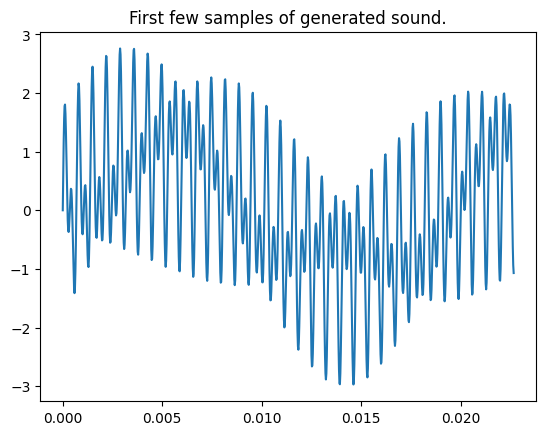

In [1]:
from scipy.signal import stft, istft
import numpy as np
import matplotlib.pyplot as plt

# make a random sound, superposition of sine waves
n_src = 3
frq_range_hz = [20,5000]
s_rate = 44100
duration = 1.0
n_samp = int(s_rate * duration)
frqs = np.random.randint(frq_range_hz[0], frq_range_hz[1], n_src)
amps = np.random.rand(n_src)*(frq_range_hz[1]-frq_range_hz[0])+frq_range_hz[0] 

t=np.linspace(0,duration,n_samp)
x = np.sum([np.sin(np.pi*2*frq*t) for amp,frq in zip(amps,frqs)] ,axis=0)

plt.plot(t[:1000], x[:1000]);plt.title('First few samples of generated sound.')
plt.show()


35


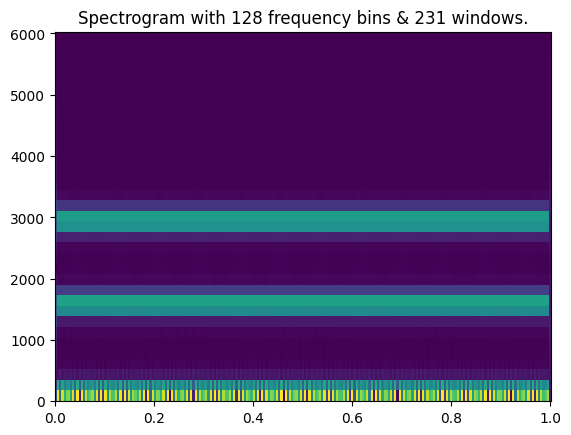

In [3]:
freq_bins,w_centers, Z= stft(x,fs=s_rate, nperseg=256, noverlap=64)
title=("Spectrogram with %i frequency bins & %i windows." % (freq_bins.size-1,w_centers.size))
power = np.abs(Z)
power = np.log(1.0+power)
max_disp_bin = np.sum(freq_bins< frq_range_hz[1])+5
print(max_disp_bin)
extent = [w_centers[0], w_centers[-1], freq_bins[0], freq_bins[max_disp_bin]]
plt.imshow(power[:max_disp_bin,:],extent=extent,origin='lower',aspect='auto',interpolation='none')
plt.title(title)
plt.show()

In [102]:
np.random.rand(2)


array([0.0601156 , 0.61221456])